# Q. Prepare a model for glass classification using KNN

> # K Nearest Neighbour (KNN)
> - `K Nearest Neighbor` algorithm falls under the **Supervised Learning** category and is used for **Classification** (most commonly) and **Regression**.
>- It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

>>The algorithm’s learning is:
>>1. **Instance-based learning**: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.
>>2. **Lazy Learning**: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.
>>3. **Non-Parametric**: In KNN, there is no predefined form of the mapping function.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data=pd.read_csv('glass.csv')

## Exploratory Data Analysis

In [3]:
data.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [4]:
data.tail()

RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7

In [5]:
data.shape   

(214, 10)

Dataset has `214` rows and `10` columns

### Descriptive Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


- The `info()` method prints information about the DataFrame. 
- The information contains the **number of columns, column labels, column data types, memory usage, range index**, and **the number of cells in each column (non-null values)**.
- **Note**: the info() method actually prints the info.

In [7]:
data.describe()

RI          Na          Mg          Al          Si           K   
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000  \
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

- The `describe()` method returns description of the data in the DataFrame. 
- If the DataFrame contains numerical data, the description contains these information for each column: `count - The number of not-empty values. mean - The average (mean) value`.

In [8]:
data.ndim

2

In [9]:
data.axes

[RangeIndex(start=0, stop=214, step=1),
 Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')]

- `axes` is a function of the **matplotlib library** that adds axes to the current graph and makes it as current axes.

In [10]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [11]:
data['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

### Pie Chart

In [12]:
fig = plt.figure(figsize = (10, 5))
fig = px.pie(data['Type'],values='Type',names='Type',title='Type of Glasses')
fig.show()

<Figure size 720x360 with 0 Axes>

#### From the above pie chart the observation is :

1. `building_windows_non_float_processed` glass has the highest value of counts
2. `vehicle_windows_float_processed` as lowest value of counts 

Type of Glasses


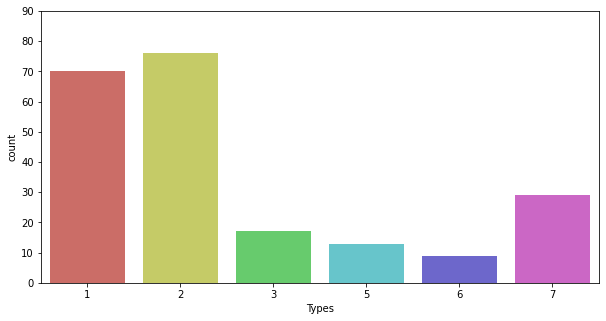

In [14]:
plt.figure(figsize = (10, 5))
print('Type of Glasses')
sns.countplot(x='Type', data=data, palette='hls')
plt.xlabel('Types')
plt.xticks(rotation=0)
plt.ylim(0,90)
plt.show()

### Null Values

In [15]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Now there is no any NA value in our dataset

### Duplicate Values

In [16]:
data[data.duplicated()].shape

(1, 10)

There is one record has been repeated so we have to remove it

In [17]:
data[data.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [18]:
data=data.drop_duplicates()

In [19]:
data[data.duplicated()].shape

(0, 10)

### Outliers Detection
- #### A `for loop` to automate our task


<Figure size 432x288 with 0 Axes>

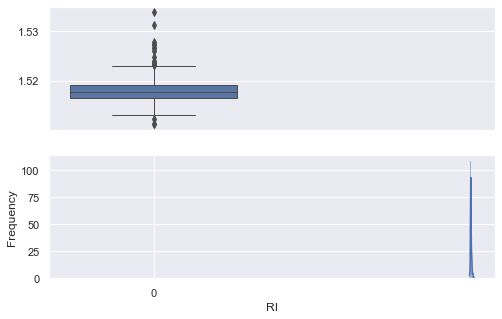

<Figure size 576x360 with 0 Axes>

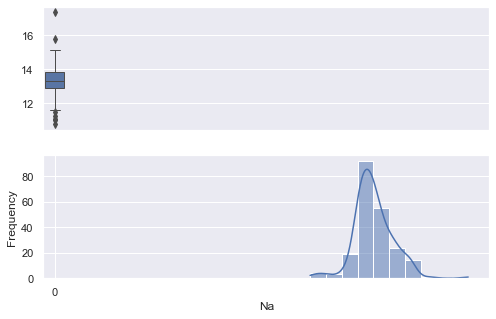

<Figure size 576x360 with 0 Axes>

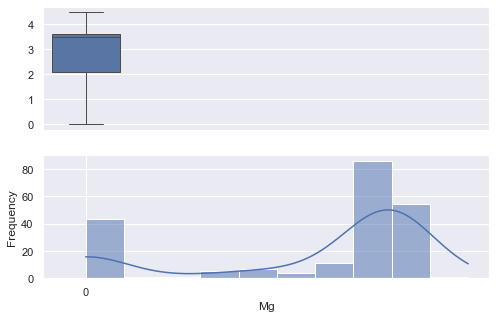

<Figure size 576x360 with 0 Axes>

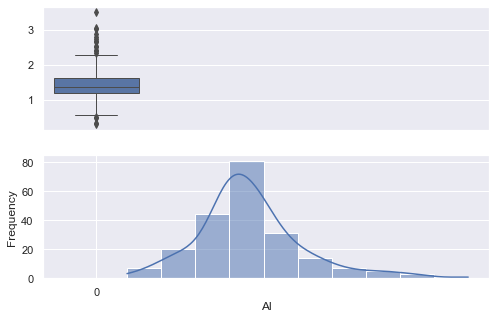

<Figure size 576x360 with 0 Axes>

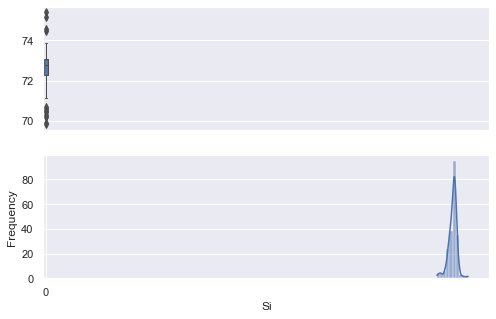

<Figure size 576x360 with 0 Axes>

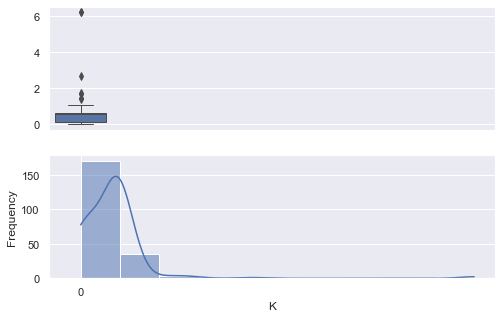

<Figure size 576x360 with 0 Axes>

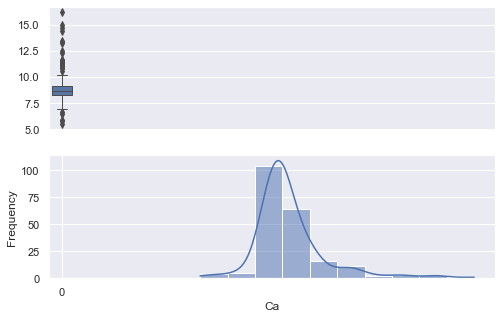

<Figure size 576x360 with 0 Axes>

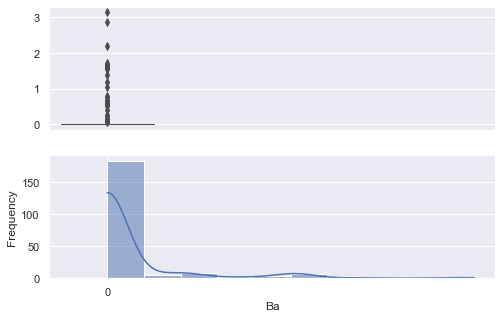

<Figure size 576x360 with 0 Axes>

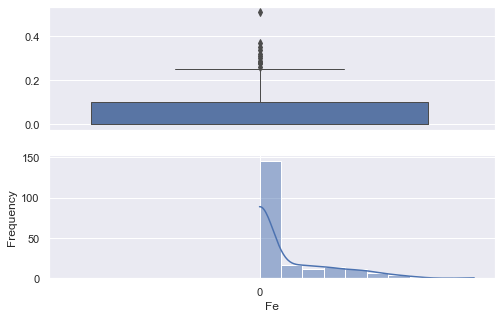

<Figure size 576x360 with 0 Axes>

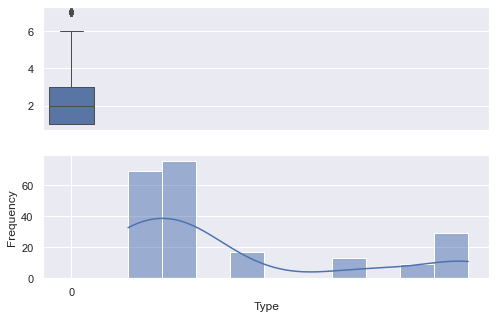

In [20]:
for i in data.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(data[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(data[i], ax=ax_hist , bins = 10,kde=True)

### From the above Boxplot figure:

RI : `refractive index`, AI: `Aluminum`, Si: `Silicon`, K:`Potassium`, Ca: `Calcium`, Ba: `Barium` and Fe: `Iron` has more numbers of outliers rather than others 


## Multivariate Analysis
- Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

### Pair Plot
- Plotting Pair Plot to visualise the attributes all at once

<Figure size 1800x1080 with 0 Axes>

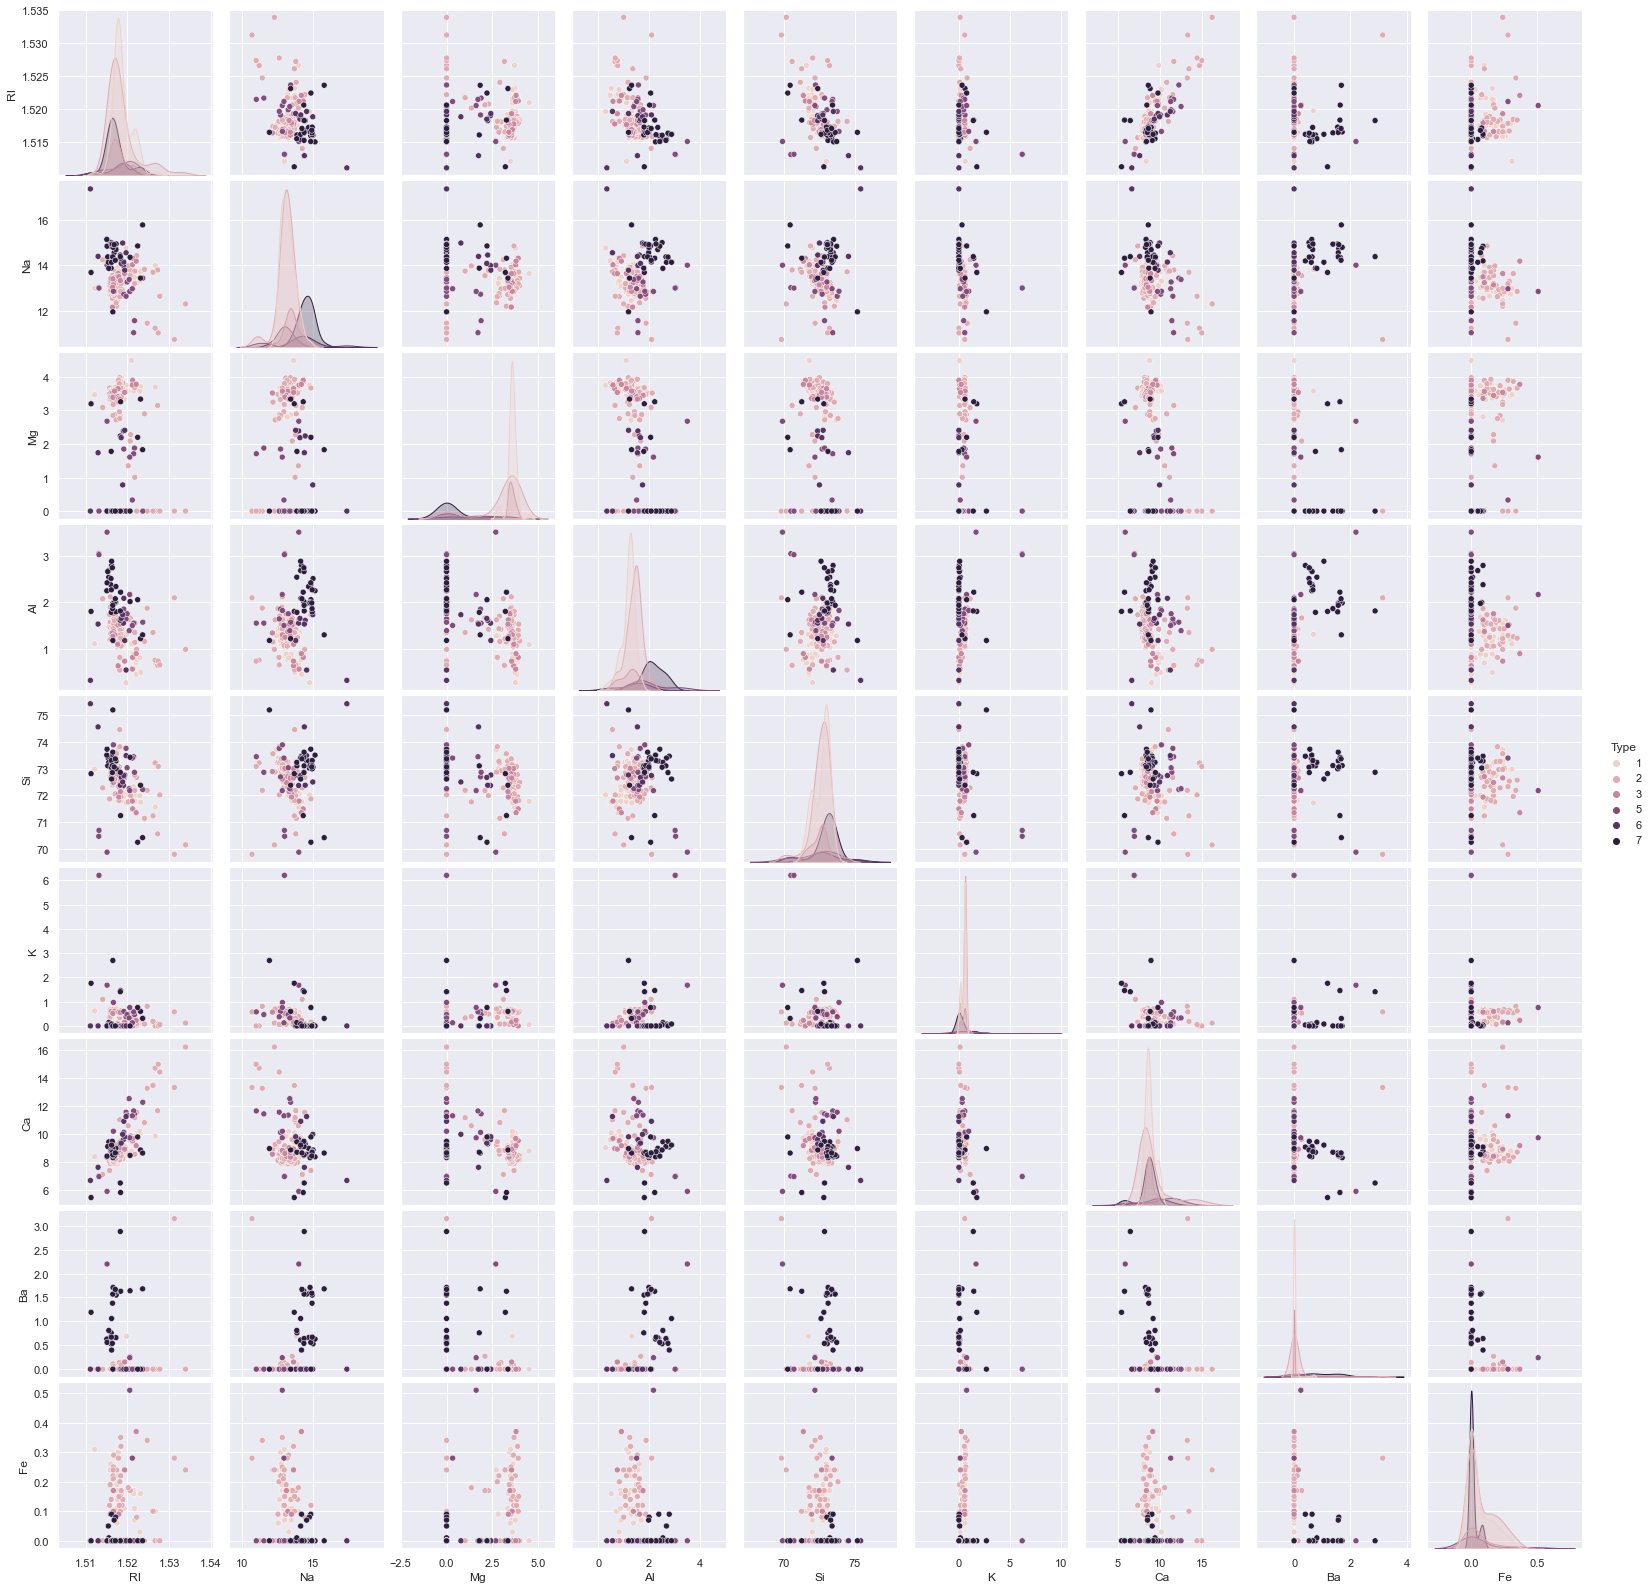

In [21]:
plt.figure(figsize=(25,15))
sns.pairplot(data=data, hue = 'Type')
plt.show()

### Regression Plot
#### 1. RI & Ca

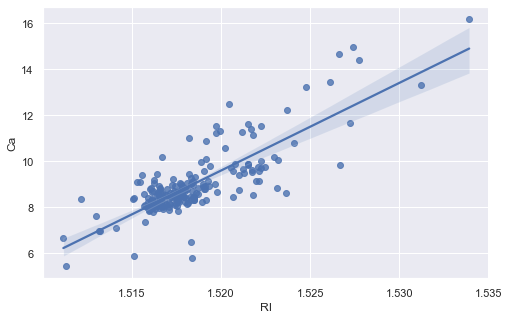

In [22]:
sns.regplot(x = "RI",y = "Ca", data = data)
plt.show()

- #### The relation is positive as the Refractive index is increasing so the Calcium is also increasing.And most of the points from dataset is fitting on a line.

#### 2. Si & Al

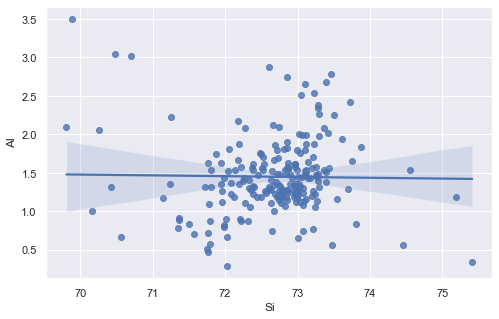

In [23]:
sns.regplot(x = "Si",y = "Al", data = data)
plt.show()

- #### It has neutral relation.There is no any relation between Aluminum with Silicon 

#### 3. RI & Al

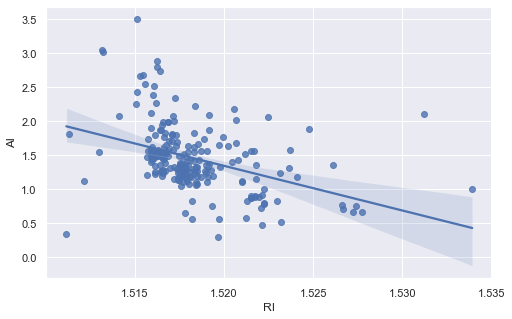

In [24]:
sns.regplot(x = "RI",y = "Al", data = data)
plt.show()

- #### The relation is negative as the Aluminium is decreasing so the Refractive Index is also decreasing.And most of the points from dataset is fitting on a line.

In [25]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

### Displots

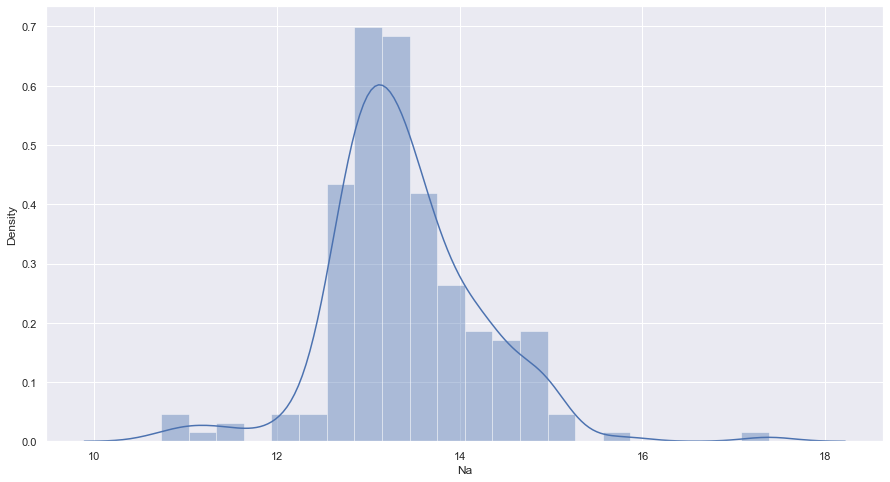

In [26]:
plt.figure(figsize=(15,8))
sns.distplot(a=data['Na'])
plt.show()

- #### The Sodium is showing normal distribution which means it has same Mean, Mode and Median but to the both end it has some outliers

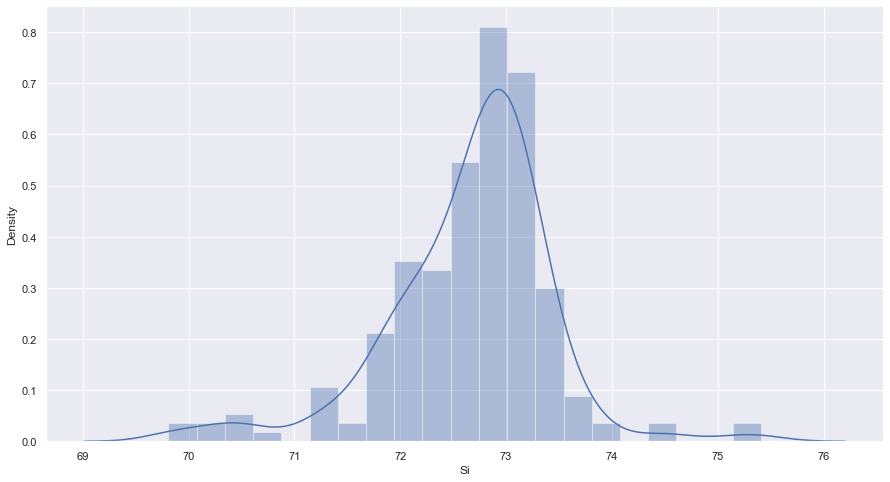

In [27]:
plt.figure(figsize=(15,8))
sns.distplot(a=data['Si'])
plt.show()

- #### The Silicon is showing Negative skew refers to a longer or fatter tail on the left side of the distribution but to the both end it has some outliers and the mean is lower than the median and mode.

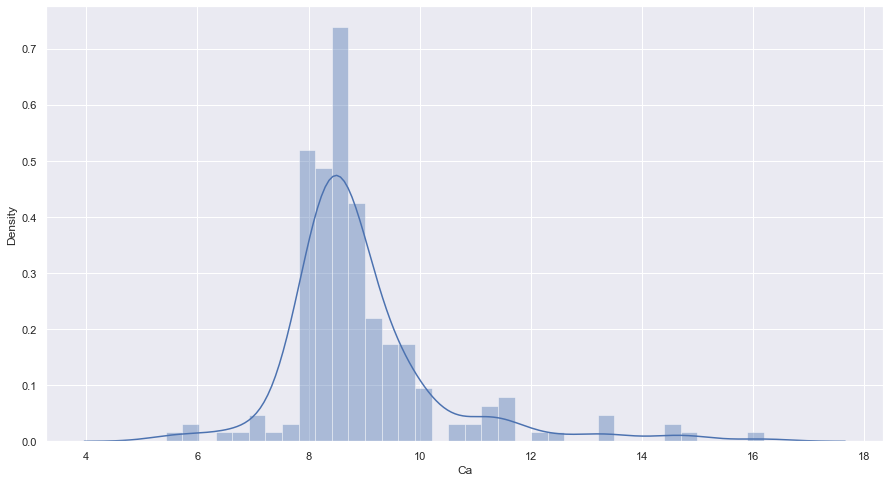

In [28]:
plt.figure(figsize=(15,8))
sns.distplot(a=data['Ca'])
plt.show()

- #### The Calcium  is showing Positive skew refers to a longer or fatter tail on the right side of the distribution but to the both end it has some outliers and the mean is graeter than the median and mode.

## Correlation Matrix

In [29]:
cor = data.corr()
cor

RI        Na        Mg        Al        Si         K        Ca   
RI    1.000000 -0.198802 -0.127526 -0.400973 -0.539000 -0.287645  0.811183  \
Na   -0.198802  1.000000 -0.278420  0.167735 -0.064885 -0.264158 -0.278194   
Mg   -0.127526 -0.278420  1.000000 -0.479575 -0.162437  0.007617 -0.446197   
Al   -0.400973  0.167735 -0.479575  1.000000 -0.016195  0.323683 -0.258068   
Si   -0.539000 -0.064885 -0.162437 -0.016195  1.000000 -0.197281 -0.207145   
K    -0.287645 -0.264158  0.007617  0.323683 -0.197281  1.000000 -0.317032   
Ca    0.811183 -0.278194 -0.446197 -0.258068 -0.207145 -0.317032  1.000000   
Ba    0.001679  0.329080 -0.491818  0.480642 -0.104389 -0.043653 -0.112208   
Fe    0.147083 -0.239374  0.085426 -0.080583 -0.097717 -0.009372  0.126314   
Type -0.160140  0.508837 -0.744195  0.597432  0.147725 -0.012455  0.002677   

            Ba        Fe      Type  
RI    0.001679  0.147083 -0.160140  
Na    0.329080 -0.239374  0.508837  
Mg   -0.491818  0.085426 -0.744195  
Al    0.480642 -0.080583  0.597432  
Si   -0.104389 -0.097717  0.147725  
K    -0.043653 -0.009372 -0.012455  
Ca   -0.112208  0.126314  0.002677  
Ba    1.000000 -0.059729  0.574896  
Fe   -0.059729  1.000000 -0.191090  
Type  0.574896 -0.191090  1.000000

- `corr()` is used to find the **Pairwise Crelation** of all columns in the Pandas Dataframe in Python. 
a- Any **NaN values** are automatically excluded & any non-numeric data type or columns in the Dataframe, it is ignored.

### Heatmap : Correlation

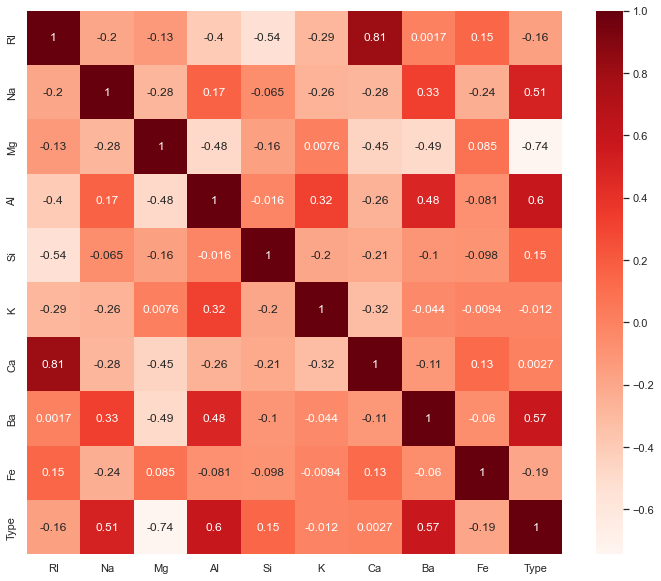

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Exploded Pie Chart

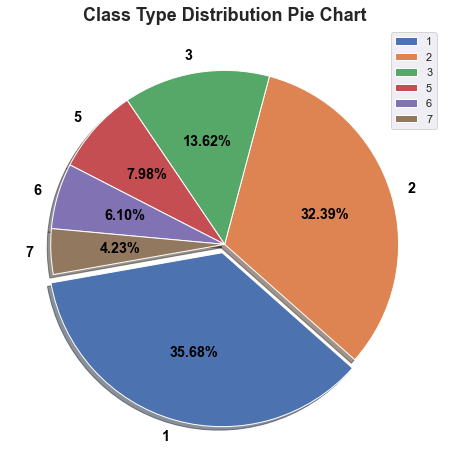

In [53]:
plt.figure(figsize = (12,8))
plt.pie(data['Type'].value_counts(),
       labels=data.Type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

## KNN : Model Building

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [33]:
array = data.values
X = array[:, 0:10]
Y = array[:, 9]

- #### The Data given is not in a one scale so we will use `MinMaxScaler Transform` features by scaling each feature to a given range. 
- #### This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

### Normalization
- This `Normalization` process can be useful for some Machine Learning Algorithms to ensure that not one feature has an undue influence on the training process because of its scale.

In [34]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [35]:
#Values are tranformed between 0 to 1 , 
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.        , 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.52063492, 0.        ,
        1.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.4984127 , 0.        ,
        1.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.53015873, 0.        ,
        1.        ]])

In [36]:
kf=KFold(n_splits=10)

- #### `KFold` helps us to avoid overfitting. 
- #### As we know when a model is trained using all of the data in a single short and give the best performance accuracy. 
- #### To resist this k-fold cross-validation helps us to build the model is a generalized one.

In [37]:
model=KNeighborsClassifier(n_neighbors=5)  #here we are defining the value of k by our own
result=cross_val_score(model,X,Y,cv=kf)

In [38]:
result

array([0.86363636, 1.        , 0.90909091, 1.        , 0.80952381,
       0.85714286, 0.9047619 , 0.0952381 , 0.42857143, 0.95238095])

In [39]:
print(round(result.mean()*100,2))

78.2


In [40]:
print(result.std()*100)

27.65723079498543


## Techniques to find the value of k

### Grid Search for Algorithm Tuning

- `Grid Search` is the simplest algorithm for hyperparameter tuning. 
- Basically, we divide the domain of the hyperparameters into a discrete grid. Then, we try every combination of values of this grid, calculating some performance metrics using cross-validation.

In [41]:
#Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [42]:
#Definig range for k value
n_nbrs=np.array([2*i+1 for i in range(0,10)])
p_g=dict(n_neighbors=n_nbrs)

In [43]:
p_g

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [44]:
model = KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=p_g,cv=10)
grid.fit(X,Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [45]:
print(grid.best_score_)
print(grid.best_params_)

0.9296536796536797
{'n_neighbors': 1}


In [46]:
#now from Grid search algorithm we have got the value of k
model=KNeighborsClassifier(n_neighbors=1)  
result1=cross_val_score(model,X,Y,cv=kf)

In [47]:
result1

array([1.        , 1.        , 0.95454545, 1.        , 0.85714286,
       0.95238095, 0.95238095, 0.66666667, 0.33333333, 0.95238095])

In [48]:
print(round(result1.mean()*100,4))

86.6883


In [49]:
print(result1.std()*100)

20.189886327174733


### Visualization : CV results

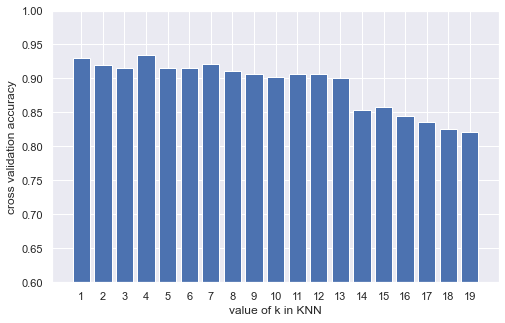

Best accuracy is : 0.8214285714285714


In [50]:
#Search for an optimal value of K for KNN

#range of k we want to try
k_range = range(1, 20)

#Empty list to store scores
k_scores = []

#We will loop through reasonable values of k
for k in k_range:
    
    #2. Run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #3. Obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    
    #4. Append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

plt.bar(k_range,k_scores)
plt.xlabel('value of k in KNN')
plt.ylabel('cross validation accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()
print("Best accuracy is :",(scores.mean()))

### According to the above graph value to `k = 4` is giving highest cross validation accuracy. 

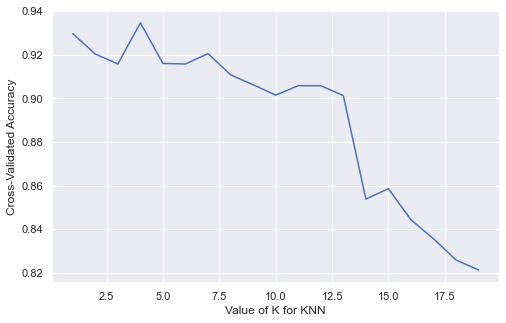

Best accuracy is : 0.8214285714285714


In [51]:
#Choose k between 1 to 20
k_range = range(1, 20)
k_scores = []

#Use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

#Plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print("Best accuracy is :",(scores.mean()))


## Here in this above graph value to `k  = 4` is giving highest Cross Validation Accuracy. 